<a href="https://colab.research.google.com/github/JZunaRepo/Random-Password-Generator/blob/main/Intro_to_tableau_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA Exercise

Choose from one of the datasets listed below:

* [titanic dataset](https://www.kaggle.com/competitions/titanic/data?select=train.csv)
* [us census & voting](https://www.kaggle.com/datasets/minhbtnguyen/us-census-for-election-predictions-20002020)
* [us real-estate](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

(or any other dataset that you'd like to explore)

Using this dataset, download it to your folder & read it into this jupyter notebook using pandas.

Perform EDA on this dataset by:
* Viewing your dataframe
* Splitting dataframe into groups
* Calculating statistics such as central-tendency
* Performing t-tests such as kolmogorov-smirnov
* And most importantly, visualizing your data

While there are sections outlined for you, you do not have to perform your analysis in any discrete order.

Generate at least 3 visualizations for your datasets including distribution via histograms, correlation via scatter-plots, and rank according to bar-charts.

Lastly, generate a write-up of your observations as you go through the `EDA` process.

## Goals Writeup

What goals do you have for your `EDA`? What sorts of trends or patterns do you hope to find?


Which column(s) do you plan to focus your analysis on?



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


# read in csv file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/county_census_and_election_result.csv")
df.head()

,year,county_fips,inctot,mortamt1,avrg_age,ftotinc,foodstmp_1_freq,foodstmp_2_freq,sex_2_freq,sex_1_freq,...,empstat_3.0_freq,empstat_2.0_freq,state_po,county_name,democrat,green,liberitarian,other,republican,winner
0,2000,1,24566.4,634.6,46.0,46912.7,93.6,6.4,54.0,46.0,...,38.4,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,33842.9,1080.1,42.4,65021.9,95.3,4.7,50.3,49.7,...,25.2,4.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,4,28331.7,814.7,45.3,52826.7,95.8,4.2,52.1,47.9,...,38.3,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,5,22782.6,557.5,46.2,43941.3,92.5,7.5,53.0,47.0,...,37.8,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,6,32245.0,1216.3,43.8,61455.3,95.7,4.3,52.0,48.0,...,35.1,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## EXPLORE METADATA
# size of data? column names? first 5 rows? metadata of df? any null values? if so, drop
df.columns

Index(['year', 'county_fips', 'inctot', 'mortamt1', 'avrg_age', 'ftotinc',
       'foodstmp_1_freq', 'foodstmp_2_freq', 'sex_2_freq', 'sex_1_freq',
       'marst_5_freq', 'marst_6_freq', 'marst_1_freq', 'marst_4_freq',
       'marst_3_freq', 'marst_2_freq', 'race_1_freq', 'race_2_freq',
       'race_7_freq', 'race_8_freq', 'race_5_freq', 'race_6_freq',
       'race_3_freq', 'race_4_freq', 'race_9_freq', 'ctz_stat_1_freq',
       'ctz_stat_3_freq', 'ctz_stat_2_freq', 'lang_1_freq', 'lang_2_freq',
       'educ_attain_2.0_freq', 'educ_attain_1.0_freq', 'educ_attain_3.0_freq',
       'educ_attain_4.0_freq', 'empstat_1.0_freq', 'empstat_3.0_freq',
       'empstat_2.0_freq', 'state_po', 'county_name', 'democrat', 'green',
       'liberitarian', 'other', 'republican', 'winner'],
      dtype='object')

In [ ]:
#Dropping all N/A values to analyze only the available data
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1670 entries, 1529 to 7524
Data columns (total 45 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1670 non-null   int64  
 1   county_fips           1670 non-null   int64  
 2   inctot                1670 non-null   float64
 3   mortamt1              1670 non-null   float64
 4   avrg_age              1670 non-null   float64
 5   ftotinc               1670 non-null   float64
 6   foodstmp_1_freq       1670 non-null   float64
 7   foodstmp_2_freq       1670 non-null   float64
 8   sex_2_freq            1670 non-null   float64
 9   sex_1_freq            1670 non-null   float64
 10  marst_5_freq          1670 non-null   float64
 11  marst_6_freq          1670 non-null   float64
 12  marst_1_freq          1670 non-null   float64
 13  marst_4_freq          1670 non-null   float64
 14  marst_3_freq          1670 non-null   float64
 15  marst_2_freq      

In [ ]:
#sex_1(males), sex_2(females), educ1(highschool), educ2(Some or bachelors ), educ3(Masters), educ4(Doctoral), inctot(avg income)
data = df[["year","sex_1_freq","sex_2_freq","sex_2_freq","educ_attain_1.0_freq","educ_attain_2.0_freq","educ_attain_3.0_freq","educ_attain_4.0_freq","democrat","republican"]]
data

,year,sex_1_freq,sex_2_freq,sex_2_freq,educ_attain_1.0_freq,educ_attain_2.0_freq,educ_attain_3.0_freq,educ_attain_4.0_freq,democrat,republican
0,2000,46.0,54.0,54.0,51.9,41.0,6.4,0.7,NaN,NaN
1,2000,49.7,50.3,50.3,36.5,53.1,8.9,1.5,NaN,NaN
2,2000,47.9,52.1,52.1,43.3,48.4,7.5,0.8,NaN,NaN
3,2000,47.0,53.0,53.0,55.7,38.3,5.2,0.8,NaN,NaN
4,2000,48.0,52.0,52.0,40.1,50.2,8.5,1.2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7521,2020,50.5,49.5,49.5,40.7,50.9,7.8,0.6,27101.0,37609.0
7522,2020,50.6,49.4,49.4,33.2,56.1,9.1,1.7,22789.0,33851.0
7523,2020,47.2,52.8,52.8,26.5,59.8,12.9,0.8,103906.0,159649.0
7524,2020,52.1,47.9,47.9,41.3,51.1,7.2,0.4,44060.0,47796.0


In [ ]:
## GROUPS
# what groups, if any, can you generate? This optional, as sometimes our entire dataframe is one large group


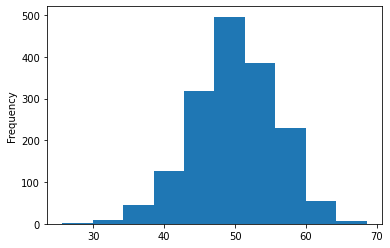

In [ ]:
## VISUALS VIA SEABORN
# create visuals using the `sns` package to display your trends amongst groups or over the entire dataframe.
# This should include: histograms, scatter-plots, and bar-graphs.
data["educ_attain_2.0_freq"].plot.hist()

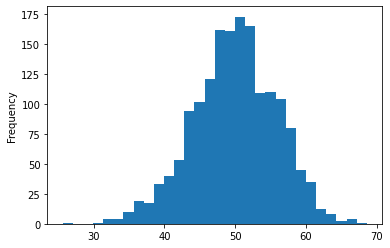

In [ ]:
data["educ_attain_2.0_freq"].plot.hist(bins=30)

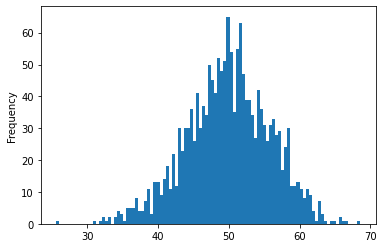

In [ ]:
data["educ_attain_2.0_freq"].plot.hist(bins=100)

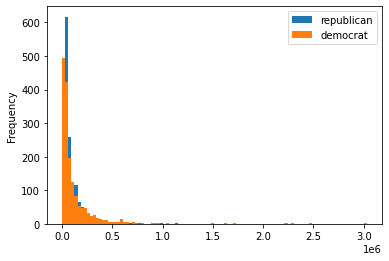

In [ ]:
data[["republican","democrat"]].plot.hist(bins=100)

In [ ]:
## K-S TEST FOR NORMALITY
# what does the kolmogorov-smirnov test tell us about its distribution?
stats.kstest(data["democrat"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
stats.kstest(data["republican"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [ ]:
stats.kstest(data["educ_attain_2.0_freq"], "norm")

KstestResult(statistic=1.0, pvalue=0.0)

((array([-3.34261013, -3.08808185, -2.94669745, ...,  2.94669745,
          3.08808185,  3.34261013]),
  array([   2187.,    2383.,    2536., ...,  956425.,  995665., 1145530.])),
 (74449.47524165174, 85685.74491017965, 0.7695972077897845))

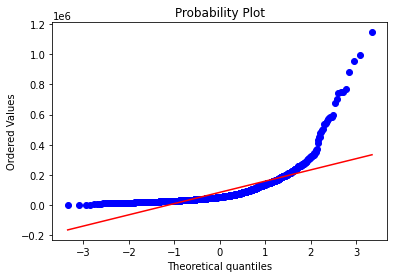

In [ ]:
## QQ-PLOT
# view this visually
stats.probplot(data["republican"], dist="norm",plot=plt)

In [ ]:
binned_language = pd.cut(data["educ_attain_2.0_freq"], bins=2)
data["bachelors_bin"] = binned_language
data["bachelors_bin"].unique()

[(25.556, 47.45], (47.45, 69.3]]
Categories (2, interval[float64, right]): [(25.556, 47.45] < (47.45, 69.3]]

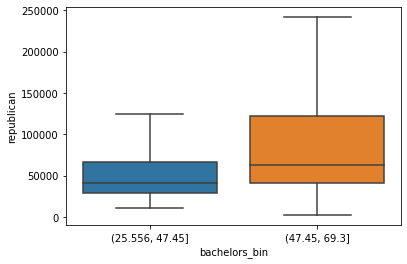

In [ ]:
sns.boxplot(data=data, x="bachelors_bin", y="republican",showfliers=False)

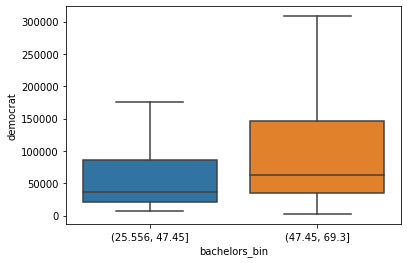

In [ ]:
sns.boxplot(data=data, x="bachelors_bin", y="democrat",showfliers=False)

## Observations

### Goal Post
Which distributions did your graphs reveal?


Did your scatter plots reveal any trends?


Any other notes?



## Next Steps

What next steps would you take to find out additional insights after this EDA?



In [ ]:
## CHALLENGE
# if your data entails `FIPS` or `lat` `long` data, create a chloroplhet map using plotly

import plotly.io as pio
pio.renderers.default='notebook'

import plotly.figure_factory as ff